In [10]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
import pandas as pd

# Load CSV files
features_3_sec = pd.read_csv('/content/drive/My Drive/NMDU/Projekt/data/GTZAN/features_3_sec.csv')
features_30_sec = pd.read_csv('/content/drive/My Drive/NMDU/Projekt/data/GTZAN/features_30_sec.csv')


In [15]:
import os
import librosa
from PIL import Image

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# Load audio data
audio_data = {}
for genre in genres:
    audio_files = os.listdir(f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/genres_original/{genre}')
    audio_data[genre] = [librosa.load(f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/genres_original/{genre}/{file}', sr=None)[0] for file in audio_files]

# Load spectrogram images
spectrogram_images = {}
for genre in genres:
    image_files = os.listdir(f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/images_original/{genre}')
    spectrogram_images[genre] = [Image.open(f'/content/drive/My Drive/NMDU/Projekt/data/GTZAN/images_original/{genre}/{file}') for file in image_files]


In [18]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def create_spectrogram(audio, sr, kind='mel', save_path=None):
    plt.figure(figsize=(10, 4))

    if kind == 'mel':
        S = librosa.feature.melspectrogram(y=audio, sr=sr)
        S_dB = librosa.power_to_db(S, ref=np.max)
        librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel Spectrogram')
    elif kind == 'stft':
        S = librosa.stft(audio)
        S_dB = librosa.amplitude_to_db(np.abs(S), ref=np.max)
        librosa.display.specshow(S_dB, x_axis='time', y_axis='linear', sr=sr)
        plt.colorbar(format='%+2.0f dB')
        plt.title('STFT Spectrogram')
    else:
        raise ValueError("Invalid spectrogram kind. Choose 'mel' or 'stft'.")

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()


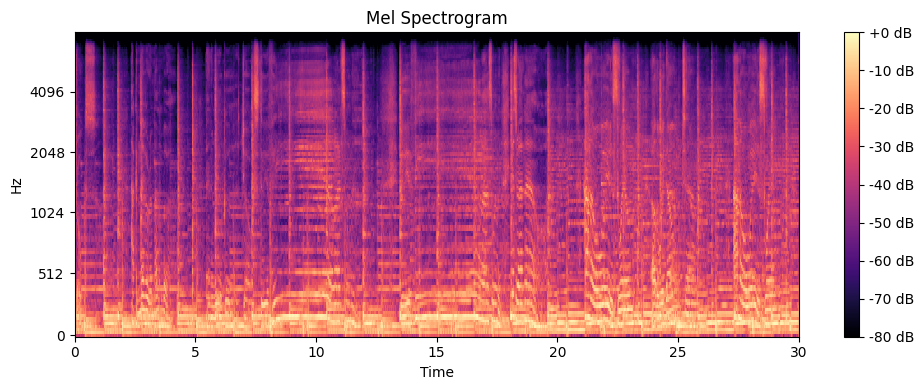

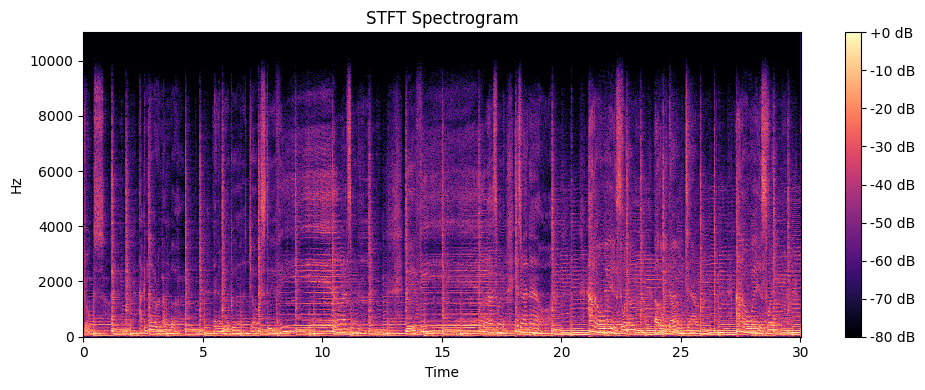

In [26]:
clip = audio_data["rock"][0]
sr = 22050  # Default sampling rate for librosa

create_spectrogram(clip, sr, kind='mel')
create_spectrogram(clip, sr, kind='stft')